In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
data = pd.read_excel("data_20_years3.xls")
data.head()

,Rank,Release,Genre,Budgets,Total Gross,Gross,Theaters,Total Gross.1,Release Date,Distributor,Estimated,MoR,Budgets.1
0,1,How the Grinch Stole Christmas,-,123.0,260044825,251.628705,3256,260044825,"['Nov', '17']",Universal Pictures,False,11,123
1,2,Mission: Impossible II,-,125.0,215409889,215.409889,3669,215409889,"['May', '24']",Paramount Pictures,False,5,125
2,3,Gladiator,-,103.0,187705427,186.610052,3188,187705427,"['May', '5']",DreamWorks Distribution,False,5,103
3,4,The Perfect Storm,-,120.0,182618434,182.618434,3407,182618434,"['Jun', '30']",Warner Bros.,False,6,120
4,5,Meet the Parents,-,55.0,166244045,161.146255,2697,166244045,"['Oct', '6']",Universal Pictures,False,10,55


In [6]:
data['year'] = 2000 + (data.index // 200)
data.head()

,Rank,Release,Genre,Budgets,Total Gross,Gross,Theaters,Total Gross.1,Release Date,Distributor,Estimated,MoR,Budgets.1,year
0,1,How the Grinch Stole Christmas,-,123.0,260044825,251.628705,3256,260044825,"['Nov', '17']",Universal Pictures,False,11,123,2000
1,2,Mission: Impossible II,-,125.0,215409889,215.409889,3669,215409889,"['May', '24']",Paramount Pictures,False,5,125,2000
2,3,Gladiator,-,103.0,187705427,186.610052,3188,187705427,"['May', '5']",DreamWorks Distribution,False,5,103,2000
3,4,The Perfect Storm,-,120.0,182618434,182.618434,3407,182618434,"['Jun', '30']",Warner Bros.,False,6,120,2000
4,5,Meet the Parents,-,55.0,166244045,161.146255,2697,166244045,"['Oct', '6']",Universal Pictures,False,10,55,2000


In [7]:
data = data[['Release','Total Gross','MoR','Budgets','Theaters','year']]
df = data[data['Budgets']!=1]
df.head()

,Release,Total Gross,MoR,Budgets,Theaters,year
0,How the Grinch Stole Christmas,260044825,11,123.0,3256,2000
1,Mission: Impossible II,215409889,5,125.0,3669,2000
2,Gladiator,187705427,5,103.0,3188,2000
3,The Perfect Storm,182618434,6,120.0,3407,2000
4,Meet the Parents,166244045,10,55.0,2697,2000


In [8]:
len(df)

2307

In [9]:
df['Total Gross'] = df['Total Gross']/1e6
df.head()

/var/folders/lw/7zkwp1j916l4xty0z4xy6mgh0000gn/T/ipykernel_44004/3259483606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Gross'] = df['Total Gross']/1e6


,Release,Total Gross,MoR,Budgets,Theaters,year
0,How the Grinch Stole Christmas,260.044825,11,123.0,3256,2000
1,Mission: Impossible II,215.409889,5,125.0,3669,2000
2,Gladiator,187.705427,5,103.0,3188,2000
3,The Perfect Storm,182.618434,6,120.0,3407,2000
4,Meet the Parents,166.244045,10,55.0,2697,2000


In [10]:
def releases_per_month(df):
    
    # plot number of releases every month
    
    value_counts = df['MoR'].value_counts()

    # Extract unique values and their frequencies
    unique_values = value_counts.index
    frequencies = value_counts.values

    # Plot a bar plot
    plt.figure(figsize=(10, 6))
    desired_value = len(df)/12
    #plt.axhline(y=desired_value, color='red', linestyle='--', label=f'Average: {desired_value}')
    bars = plt.bar(unique_values, frequencies, color='blue')

# Annotate the bars with their respective frequencies
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')
    
    #plt.bar(unique_values, frequencies, color='blue')
    plt.xlabel('Months')
    plt.ylabel('Number of Releases')
    plt.xticks(unique_values)
    plt.title('Frequency of movie releases every month')
    #plt.legend()
    plt.show()
    

In [11]:
def gross_per_month(df):
    
    a = df.groupby('MoR')
    b = a['Total Gross'].sum()
    mydict = {}

    for i in range(len(b)):
    
        mydict[i+1] = b.iloc[i]/1e3
    
    indices = mydict.keys()
    values = mydict.values()

    plt.figure(figsize=(10, 6))
    
    
    bars = plt.bar(indices, values, color='blue')

# Annotate the bars with their respective frequencies
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05 * yval, f'{yval:0.2f}', ha='center', va='bottom')
        #plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

    
    plt.xlabel("Month")
    plt.ylabel("Gross in billions")
    #plt.xticks(indices)
    plt.title("Total Gross per Month across 20 years")
    plt.show()

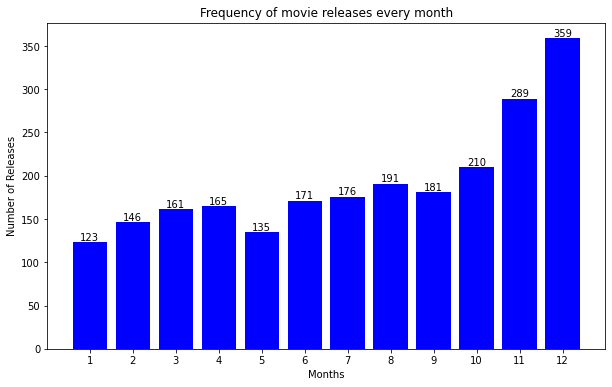

In [12]:
releases_per_month(df)

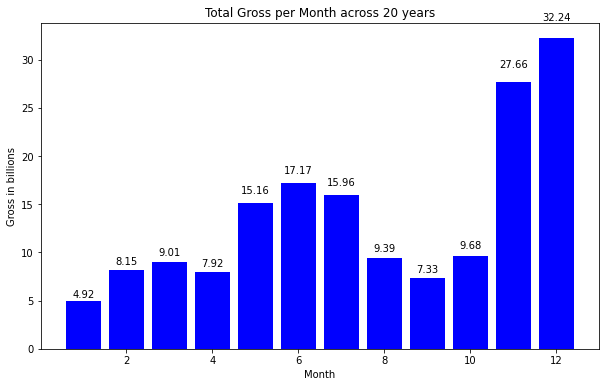

In [13]:
gross_per_month(df)

In [14]:
def assign_potential(df):
   
   
    ratio = df['Total Gross']/df['Budgets']
    
    if(ratio>1.5):
        return "Blockbuster"
    elif(ratio<1.5 and ratio > 0.6):
        return "Decent"
    else:
        return "Flop"
df['Potential'] = df.apply(assign_potential,axis=1)

/var/folders/lw/7zkwp1j916l4xty0z4xy6mgh0000gn/T/ipykernel_44004/1372818274.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Potential'] = df.apply(assign_potential,axis=1)


In [15]:
df.head()

,Release,Total Gross,MoR,Budgets,Theaters,year,Potential
0,How the Grinch Stole Christmas,260.044825,11,123.0,3256,2000,Blockbuster
1,Mission: Impossible II,215.409889,5,125.0,3669,2000,Blockbuster
2,Gladiator,187.705427,5,103.0,3188,2000,Blockbuster
3,The Perfect Storm,182.618434,6,120.0,3407,2000,Blockbuster
4,Meet the Parents,166.244045,10,55.0,2697,2000,Blockbuster


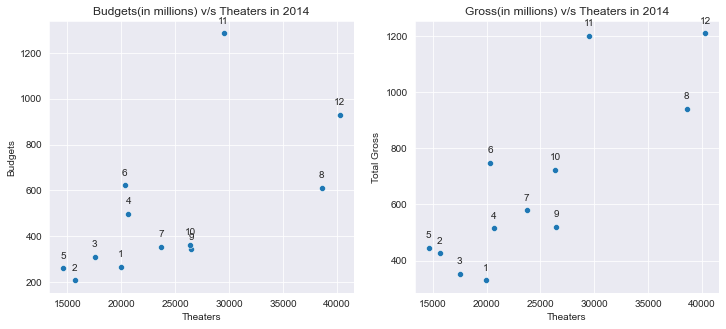

In [16]:
def yearly_stats1(df,y):
    
    a = df[df['year']==y]
    
    b = a.groupby('MoR')
    result = b[['Theaters','Budgets','Total Gross']].sum() 
    
    sb.set_style('dark')
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first scatterplot
    sb.scatterplot(x='Theaters', y='Budgets', data=result, ax=axs[0])
    for i, row in result.iterrows():
        axs[0].annotate(i, (row['Theaters'], row['Budgets']), textcoords="offset points", xytext=(0, 10), ha='center')

# Plot the second scatterplot
    sb.scatterplot(x='Theaters', y='Total Gross', data=result, ax=axs[1])
    for i, row in result.iterrows():
        axs[1].annotate(i, (row['Theaters'], row['Total Gross']), textcoords="offset points", xytext=(0, 10), ha='center')
        
    axs[0].grid(True)
    axs[1].grid(True)
# Set plot titles
    axs[0].set_title(f'Budgets(in millions) v/s Theaters in {y}')
    axs[1].set_title(f'Gross(in millions) v/s Theaters in {y}')
    
    plt.show()
yearly_stats1(df,2014)

In [17]:
#to verify the above results

filtered_df = df[(df['year'] == 2014) & (df['MoR'] == 11)]

sum_target_column = filtered_df[['Release','Budgets','Total Gross']]
sum_target_column

,Release,Budgets,Total Gross
2808,Big Hero 6,165.0,222.527828
2814,Interstellar,165.0,188.020017
2819,Frozen,150.0,400.738009
2842,Penguins of Madagascar,132.0,83.850911
2862,Horrible Bosses 2,42.0,54.445357
2907,The Theory of Everything,15.0,35.893537
2912,Philomena,12.0,37.709979
2914,The Imitation Game,14.0,91.125683
2930,Beyond the Lights,7.0,14.618727
2940,Dallas Buyers Club,5.0,27.298285


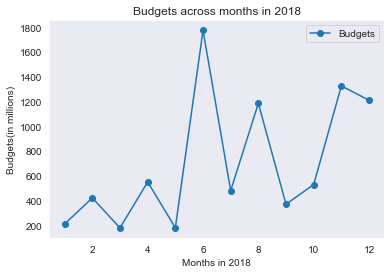

In [18]:
def yearly_stats2(df,year):
    
    #for a year, plot 3 curves - budget, total gross and theaters summed across all months. 
    
    filtered_df = df[(df['year']==year)]
    
    a = filtered_df.groupby('MoR')
    
    y1 = a['Budgets'].sum()
    y2 = a['Total Gross'].sum()
    y3 = a['Theaters'].sum()
    
    x = [i for i in range(1,13)]
    plt.plot(x,y1,label='Budgets',marker='o')
    plt.xlabel(f"Months in {year}")
    plt.ylabel("Budgets(in millions)")
    plt.title(f"Budgets across months in {year}")
    plt.legend()
    plt.show()
yearly_stats2(df,2018)

In [20]:
ndf = df[(df['year']==2004) & (df['MoR']==6)]
ndf[['Release','Total Gross','Budgets']]

,Release,Total Gross,Budgets
801,Spider-Man 2,373.585825,200.0
803,Harry Potter and the Prisoner of Azkaban,249.541069,130.0
816,Fahrenheit 9/11,119.194771,6.0
817,Dodgeball: A True Underdog Story,114.326736,20.0
831,The Notebook,81.001787,29.0
834,The Terminal,77.872883,60.0
839,White Chicks,70.831760,37.0
851,The Stepford Wives,59.484742,90.0
855,The Chronicles of Riddick,57.761012,110.0
867,Napoleon Dynamite,44.540956,400.0


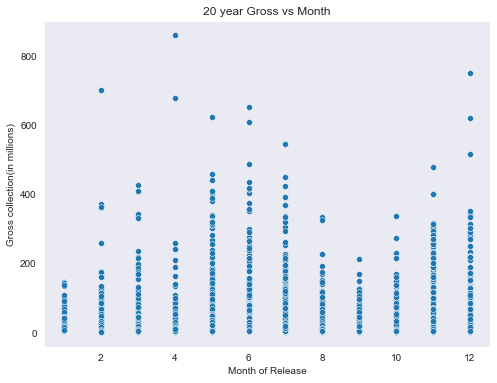

In [21]:
def plot1(df):
    
    plt.figure(figsize=(8,6))
    sb.set_style('dark')
    sb.scatterplot(x='MoR',y='Total Gross',data = df)
    
    plt.xlabel("Month of Release")
    plt.ylabel("Gross collection(in millions)")
    plt.title("20 year Gross vs Month")
    plt.show()
plot1(df)

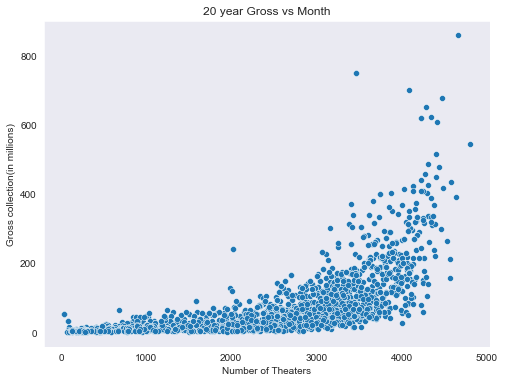

In [22]:
def plot2(df):
    
    plt.figure(figsize=(8,6))
    sb.set_style('dark')
    sb.scatterplot(x='Theaters',y='Total Gross',data = df)
    
    plt.xlabel("Number of Theaters")
    plt.ylabel("Gross collection(in millions)")
    plt.title("20 year Gross vs Month")
    plt.show()
plot2(df)

In [3]:
def plot3(df):
    
    plt.figure(figsize=(8,6))
    sb.set_style('dark')
    colors = {'Blockbuster': 'green', 'Decent': 'blue', 'Flop': 'red'}

    df['Color'] = df['Potential'].map(colors)

# Create a scatter plot using Seaborn
    sb.scatterplot(x='Theaters', y='Budgets', hue='Potential', palette=colors, data=df, legend='full')

    
    plt.xlabel("Number of Theaters")
    plt.ylabel("Budgets (in millions)")
    plt.title("20 year Budgets vs Theaters")
    plt.show()
plot3(df)

NameError: name 'df' is not defined

/var/folders/lw/7zkwp1j916l4xty0z4xy6mgh0000gn/T/ipykernel_44004/164667535.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Color'] = df['Potential'].map(colors)


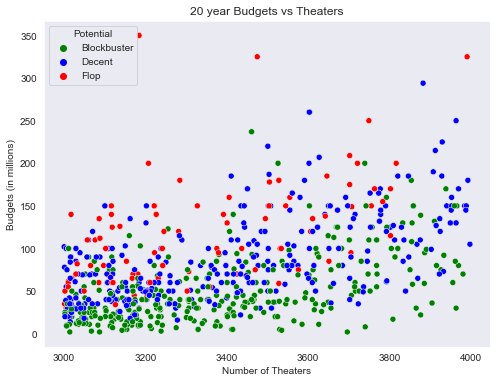

/var/folders/lw/7zkwp1j916l4xty0z4xy6mgh0000gn/T/ipykernel_44004/45778253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Color'] = df['Potential'].map(colors)


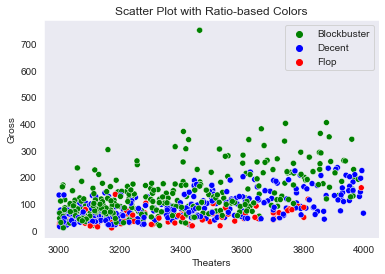

In [42]:
df1 = df[(df['Theaters']<4000) & (df['Theaters']>3000)]
plot3(df1)

plot5(df1)

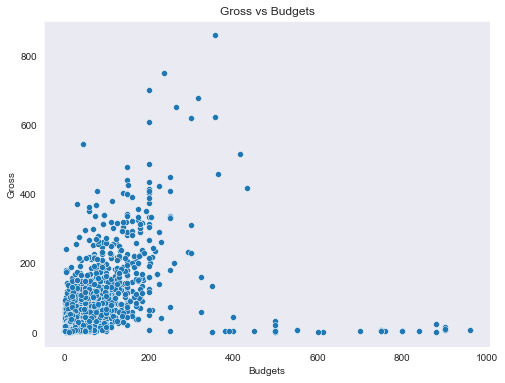

In [24]:
def plot4(df):
    
    plt.figure(figsize=(8,6))
    sb.set_style('dark')
    sb.scatterplot(y='Total Gross',x='Budgets',data = df)
    
    plt.xlabel("Budgets")
    plt.ylabel("Gross")
    plt.title("Gross vs Budgets")
    plt.show()
plot4(df)  

/var/folders/lw/7zkwp1j916l4xty0z4xy6mgh0000gn/T/ipykernel_44004/45778253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Color'] = df['Potential'].map(colors)


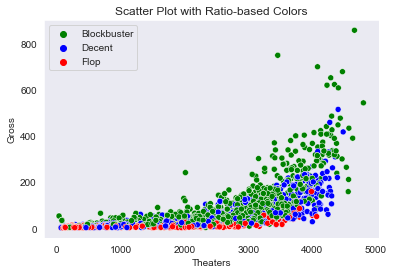

In [41]:
def plot5(df):
    
    colors = {'Blockbuster': 'green', 'Decent': 'blue', 'Flop': 'red'}

    df['Color'] = df['Potential'].map(colors)

# Create a scatter plot using Seaborn
    sb.scatterplot(x='Theaters', y='Total Gross', hue='Potential', palette=colors, data=df, legend='full')

# Add legend
    plt.legend(title='Ratio')

# Add labels and title
    plt.xlabel('Theaters')
    plt.ylabel('Gross')
    plt.title('Scatter Plot with Ratio-based Colors')
    
# Add legend
    plt.legend()
    plt.show()
plot5(df)    

In [ ]:
df.head()

In [ ]:
df.to_csv("training_set1")